## Climate Stripes
In this exercise, you will reproduce the famous climate stripe cover from the Economist.

#### Step 2: Read the data into a DataFrame
Reading the ECAD data into pandas is a bit trickier than a standard CSV file. You will need to inspect the file in a text editor (not Excel). Pay attention to the following:

- What is the column separator?
- Are there any headers?
- How many lines contain comments before the real data starts?
- Look up the parameters of pd.read_csv(). They are sufficient to read the file.

In [87]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [88]:
# Read data into DataFrame
df = pd.read_csv('ECA_blended_custom/TG_STAID011740.txt', header = 14)
df

,SOUID,DATE,TG,Q_TG
0,180888,19480701,126,0
1,180888,19480702,160,0
2,180888,19480703,126,0
3,180888,19480704,160,0
4,180888,19480705,174,0
...,...,...,...,...
27085,180932,20220827,-9999,9
27086,180932,20220828,-9999,9
27087,180932,20220829,-9999,9
27088,180932,20220830,-9999,9


#### Step 3: Data Wrangling
The TG column contains the temperature measured in 0.1 Celsius degrees. This was probably established decades ago when disk space and memory were more expensive (integers take less space).

- Create a new column by dividing the temperature by 10.
- Plot the raw temperature data as a line plot.

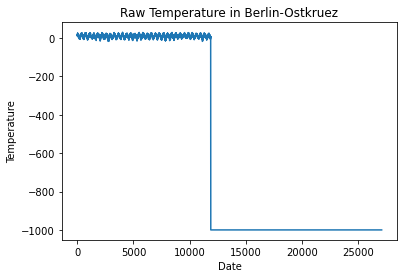

In [89]:
# Remove white space in column names
df.columns = df.columns.str.replace(' ', '')

# Create new column RAW_TEMP
df['RAW_TEMP'] = df['TG'] / 10
df

# Plot the raw temperature column as line plot
df['RAW_TEMP'].plot(title = 'Raw Temperature in Berlin-Ostkruez', xlabel = 'Date', ylabel = 'Temperature')
plt.show()

#### Step 4: Time Axis

The DATE column contains timestamps in the YYYYMMDD format. You need to convert these to pandas timestamps.
- First, convert the DATE column to a string data type.
- Second, use the following expression to slice off year, month and day:
df['year'] = df[col].str[x:y]
- Put the elements into separate columns. Then, create a new date column via string concatenation:
df[col1] + '-' + df[col2]
- The final date column should have the format YYYY-MM-DD. Now you can convert the strings with dates into a timestamp index with:
df.set_index(pd.to_datetime(date_series))
- Plot the temperature as a line plot again. Now, the x-axis should look much better.

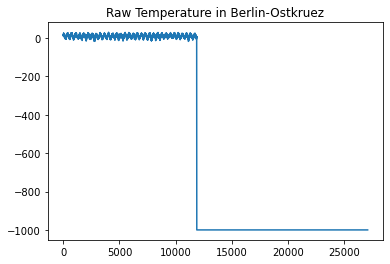

In [90]:
# Convert the DATE column to a string data type
df['DATE'] = df['DATE'].astype(str)

# Slice off year, month and day & put them in separate columns
df['YEAR'] = df['DATE'].str[:4]
df['MONTH'] = df['DATE'].str[4:6]
df['DAY'] = df['DATE'].str[6:]

# Create a new date column
df['DATE2'] = df['YEAR'] + '-' + df['MONTH'] + '-' + df['DAY']

# Convert the strings with dates into a timestamp index
df.set_index(pd.to_datetime(df['DATE2']))

df

# Plot the temperature column as line plot
df['RAW_TEMP'].plot(title = 'Raw Temperature in Berlin-Ostkruez')
plt.show()

#### Step 5: Missing Values
- For some cities, the data may contain missing values. In the original files the value -9999 is used. This can be done with the replace() method:
df[col].replace(-999.9, new_value)  # after scaling

- As a new value, use the overall median temperature. Place the result of the expression in a new column.

Hint:
Instead of the median, you could average over the year before and after the gap or take the mean of exactly the same day of the adjacent years.

In [91]:
# Replace missing values in RAW_TEMP column with overall median temperature
median_temp = (df['RAW_TEMP'] != -999.9).median()
df['NEW_TEMP'] = df['RAW_TEMP'].replace(-999.9, median_temp)

df

,SOUID,DATE,TG,Q_TG,RAW_TEMP,YEAR,MONTH,DAY,DATE2,NEW_TEMP
0,180888,19480701,126,0,12.6,1948,07,01,1948-07-01,12.6
1,180888,19480702,160,0,16.0,1948,07,02,1948-07-02,16.0
2,180888,19480703,126,0,12.6,1948,07,03,1948-07-03,12.6
3,180888,19480704,160,0,16.0,1948,07,04,1948-07-04,16.0
4,180888,19480705,174,0,17.4,1948,07,05,1948-07-05,17.4
...,...,...,...,...,...,...,...,...,...,...
27085,180932,20220827,-9999,9,-999.9,2022,08,27,2022-08-27,0.0
27086,180932,20220828,-9999,9,-999.9,2022,08,28,2022-08-28,0.0
27087,180932,20220829,-9999,9,-999.9,2022,08,29,2022-08-29,0.0
27088,180932,20220830,-9999,9,-999.9,2022,08,30,2022-08-30,0.0


#### Step 6: Cut off the last year
Before calculating median temperatures, make sure the last year is complete as well. It can be cut off by slicing the index with a simple date string. Pandas takes care of the parsing:
df.loc[:'2021-12-31']

In [92]:
df = df.set_index('DATE2')
df.loc[:'2021-12-31']

,SOUID,DATE,TG,Q_TG,RAW_TEMP,YEAR,MONTH,DAY,NEW_TEMP
DATE2,,,,,,,,,
1948-07-01,180888,19480701,126,0,12.6,1948,07,01,12.6
1948-07-02,180888,19480702,160,0,16.0,1948,07,02,16.0
1948-07-03,180888,19480703,126,0,12.6,1948,07,03,12.6
1948-07-04,180888,19480704,160,0,16.0,1948,07,04,16.0
1948-07-05,180888,19480705,174,0,17.4,1948,07,05,17.4
...,...,...,...,...,...,...,...,...,...
2021-12-27,180932,20211227,-9999,9,-999.9,2021,12,27,0.0
2021-12-28,180932,20211228,-9999,9,-999.9,2021,12,28,0.0
2021-12-29,180932,20211229,-9999,9,-999.9,2021,12,29,0.0


#### Step 7: Aggregate
- Now reduce the data to one value per year using the median. This could be done with a df.groupby():
df.groupby('year')[col2].median()
- However, with a timestamp index it is better to use df.resample():
yearly = df.resample(freq='Y').median()
The resampling has the advantage that you still have a timestamp index after the operation.
- You may want to create a DataFrame out of the series:
df = pd.DataFrame(yearly)
- Plot the aggregate as a line plot again.

Hint: You may want to try out resampling different frequencies. pandas understands frequency values like '3M2d5h10sec'

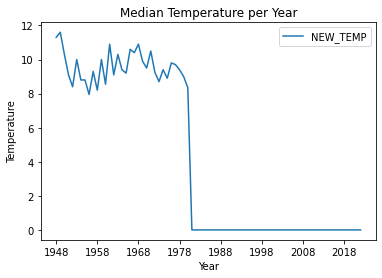

In [93]:
# Reduce the data to one value per year using the median
yearly = df.groupby('YEAR')['NEW_TEMP'].median()
df = pd.DataFrame(yearly)

'''yearly = df.resample(freq='Y').median()
df = pd.DataFrame(yearly)'''

# Plot the aggregate as a line plot
df.plot(title = 'Median Temperature per Year', xlabel='Year', ylabel='Temperature')
plt.show()

#### Step 7: Heatmap
- The seaborn library has a heatmap function that you can use to plot the stripes.
- Save your stripe image to a file.

<AxesSubplot:title={'center':'Yearly median temperature in Berlin-Ostkreuz'}, ylabel='YEAR'>

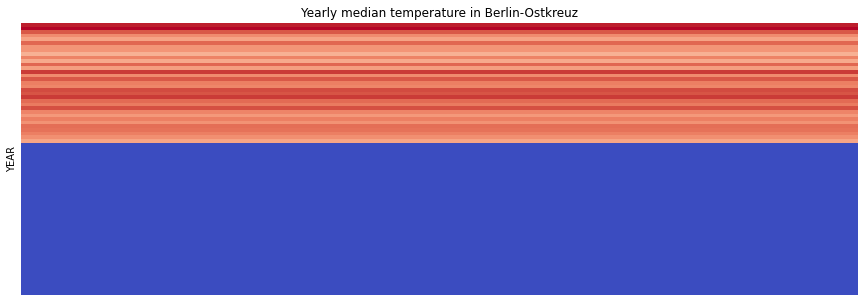

In [94]:
# Plot heatmap
cmap = plt.get_cmap('coolwarm')

plt.figure(figsize=(15, 5))
plt.title('Yearly median temperature in Berlin-Ostkreuz')
sns.heatmap(df, cmap=cmap, cbar=False, yticklabels=[], xticklabels=[])

<AxesSubplot:title={'center':'Yearly median temperature in Berlin-Ostkreuz'}, xlabel='YEAR'>

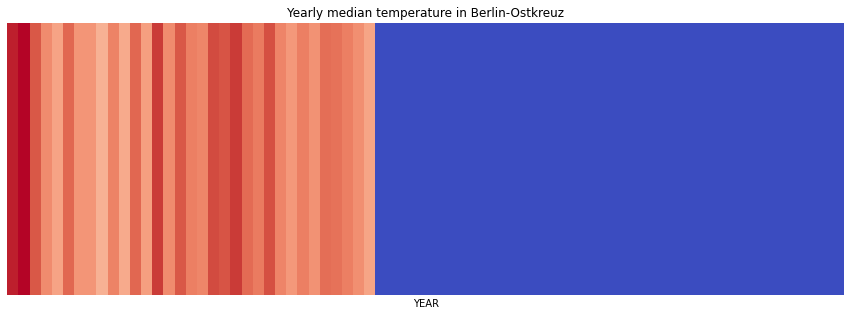

In [96]:
df = df.transpose()

# Plot heatmap
cmap = plt.get_cmap('coolwarm')

plt.figure(figsize=(15, 5))
plt.title('Yearly median temperature in Berlin-Ostkreuz')
sns.heatmap(df, cmap=cmap, cbar=False, yticklabels=[], xticklabels=[])


#### Bonus: Smoothing
- Before the resampling, you may average over a 5-year window (rolling mean)
- Compare the resulting heatmap.

In [99]:
'''ts = df['NEW_TEMP'].rolling(window=5 * 365).mean()
ts'''

"ts = df['NEW_TEMP'].rolling(window=5 * 365).mean()\nts"